In [3]:
import pandas as pd
import numpy as np

In [4]:
# Charge the TCGA survival data and adjust the format
os_tcga = pd.read_csv("./Data/citokine7ramon/tcgadat/survdat0.csv").rename(columns={"Unnamed: 0":"Sample","status":"OS","time":"OS.time"}).set_index("Sample").sort_index()
os_tcga.head()

,OS.time,OS
Sample,,
TCGA.2J.AAB6.01,293,1
TCGA.2J.AAB8.01,80,0
TCGA.2J.AAB9.01,627,1
TCGA.2J.AABA.01,607,1
TCGA.2J.AABE.01,676,0


In [5]:
tcga = pd.read_csv("./Data/citokine7ramon/tcgadat/tpmtcga.csv").rename(columns= {"Unnamed: 0":"Sample"})

# Check the missing values and eliminate them from the dataframe
tcga.Sample.replace("\?.*",np.nan,regex=True,inplace=True)
print(tcga.Sample.isna().sum())
tcga.dropna(inplace=True)

# Leave only the gene symbol anotation in this column
tcga.Sample.replace("\|\d*","",regex=True,inplace=True)
tcga= tcga.set_index("Sample")

# Keep the samples we have survival data for
tcga = tcga[tcga.columns.intersection(os_tcga.index)].T.sort_index()

tcga


6


Sample,A1BG,A1CF,A2BP1,A2LD1,A2ML1,A2M,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA.2J.AAB6.01,2.297025,0.096002,0.000000,6.305004,32.287120,205.355181,49.337882,0.074087,0.018407,50.961599,...,0.315160,5.348758,8.599770,0.015360,9.244299,536.004610,6.483578,15.014722,0.746628,0.000000
TCGA.2J.AAB8.01,1.988100,0.493875,0.000000,8.951757,0.374457,432.498098,21.522691,0.741091,0.018413,60.943865,...,0.958377,8.816501,8.425653,0.122919,11.454073,332.460793,7.690131,18.916415,3.020611,0.000000
TCGA.2J.AAB9.01,2.593508,0.220540,0.017890,5.669067,10.016139,514.282189,43.456376,2.799712,0.000000,46.229667,...,1.094688,6.656577,6.711048,0.024700,7.668009,325.450251,7.093374,12.553404,0.747060,0.000000
TCGA.2J.AABA.01,3.708424,0.294523,0.000000,5.144273,20.767661,332.052500,37.252483,0.530341,0.395301,50.924185,...,1.516058,7.807530,16.502740,0.043982,17.095512,295.889471,13.611275,26.468188,1.187701,0.065361
TCGA.2J.AABE.01,2.802831,0.045728,0.000000,6.570497,1.678084,337.799307,39.543163,2.816080,0.000000,54.250448,...,1.546818,10.855597,11.042890,0.020486,9.650307,432.691154,7.855796,14.790268,1.726023,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA.XN.A8T3.01,4.349919,0.292959,0.000000,4.779043,0.011106,537.101395,37.494476,3.639921,0.009830,53.667046,...,1.050219,6.221963,10.740537,0.016406,11.748465,318.256343,11.142176,21.117171,1.630324,0.000000
TCGA.XN.A8T5.01,4.293035,0.140353,0.099620,4.307428,0.266041,611.464252,30.158132,4.312227,0.000000,37.918202,...,1.564276,10.025490,9.254145,0.058948,11.673897,390.370249,12.435455,18.143404,2.504518,0.000000
TCGA.YB.A89D.01,5.076589,1.008882,0.022733,4.687084,0.148738,659.457816,44.071512,1.476046,0.065824,42.799887,...,1.004641,10.086219,6.703249,0.000000,11.788005,473.026588,8.188995,13.149101,1.118822,0.000000
TCGA.YY.A8LH.01,2.032868,0.390515,0.083852,5.185709,0.174170,119.731796,14.958713,6.980211,0.061663,52.220338,...,1.045207,8.871354,6.542335,0.000000,4.808089,259.650404,6.635721,9.165150,0.166744,0.000000


In [6]:
# Charge the survival au data and provide the correct format
os_au_rna = pd.read_csv("./Data/citokine7ramon/icgc_au_rnaseq/survicgcaurna.csv").rename(columns={"Unnamed: 0":"Sample","survstatus":"OS","survtime":"OS.time"}).set_index("Sample").sort_index()
os_au_rna["OS"] = os_au_rna.OS.str.replace("deceased","1")
os_au_rna["OS"] = os_au_rna.OS.str.replace("alive","0")
os_au_rna=os_au_rna.astype(int)
# Show the shape and the first rows
print(os_au_rna.shape)
os_au_rna.head()

(59, 2)


,OS.time,OS
Sample,,
DO32860,1259,1
DO32863,715,1
DO32875,348,1
DO32878,260,1
DO32900,768,1


In [7]:
# Charge the tpm converted expression dataframe 
au_rna = pd.read_csv("./Data/citokine7ramon/icgc_au_rnaseq/tpmaurnaseqALL.csv").rename(columns={"Unnamed: 0":"ENSEMBL"})

# Charge the annotation file
au_rna_symbols = pd.read_csv("./Data/citokine7ramon/icgc_au_rnaseq/symbolicgcaurnanots.csv")

# Create a dictionary with the gene symbol correspondance for each ensembl id
aunnotation_dict = dict(zip(au_rna_symbols.ENSEMBL,au_rna_symbols.SYMBOL))

# Check if there are missing values or duplicates when we do the converssion
print(au_rna.ENSEMBL.map(aunnotation_dict).isna().sum())
print(au_rna.ENSEMBL.map(aunnotation_dict).duplicated().sum())

# Actually do the conversion and remove the nas and duplicates
au_rna["Sample"] = au_rna.ENSEMBL.map(aunnotation_dict)
au_rna = au_rna.dropna(subset="Sample").drop_duplicates(subset="Sample").set_index("Sample")

# Keep the samples we have survival data for
au_rna = au_rna[au_rna.columns.intersection(os_au_rna.index)].T.sort_index()

# Show the shape and the first rows
print(au_rna.shape)
au_rna.head()

15
43
(59, 21224)


Sample,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,ZNF587B,RAB11B-AS1,SPIB,ERVV-1,C10orf95-AS1,ZIM2,MIR1470,KCNQ1OT1,RNF225,EGLN2
DO32860,46.518133,0.043857,98.711275,23.241363,5.329052,11.875111,148.765656,59.646954,27.480726,14.748216,...,18.989886,5.460595,3.464287,0.000000,21.537766,0.218794,0.0,12.479457,0.134187,47.443532
DO32863,61.902894,0.065983,73.321550,11.704381,5.822802,7.290643,223.547305,48.788650,14.371234,14.494219,...,7.981509,2.836338,0.906453,0.000000,8.352220,0.123443,0.0,3.269647,0.201888,41.496944
DO32875,93.287225,0.032581,110.460250,20.162811,14.107070,12.692274,140.178515,70.549520,24.741307,15.010725,...,10.982284,4.636182,25.330459,0.059486,20.682612,0.040635,0.0,10.178653,0.299061,85.633412
DO32878,47.796547,0.000000,79.633456,13.098718,4.111204,5.594381,36.882762,60.354633,13.978196,12.608040,...,6.885649,7.948237,0.920802,0.072521,8.959333,0.185774,0.0,4.869373,0.729186,48.870152
DO32900,87.561009,0.028971,85.903162,17.813563,7.199914,3.568012,334.661866,41.609901,40.471205,15.140202,...,14.977515,4.466067,3.109333,0.000000,20.238496,0.397466,0.0,12.822182,0.177285,56.235582


CA DATASET

In [8]:
# Charge the survival au data and provide the correct format
ca_rna_os = pd.read_csv("./Data/citokine7ramon/icgc_cadat/donorED3chem.csv")[['icgc_donor_id','donor_survival_time','donor_vital_status']].rename(columns={"icgc_donor_id":"Sample",
                                                                                                                                                           "donor_vital_status":"OS",
                                                                                                                                                           "donor_survival_time":"OS.time"})
ca_rna_os.set_index("Sample", inplace=True)
ca_rna_os["OS"] = ca_rna_os.OS.str.replace("deceased","1")
ca_rna_os["OS"] = ca_rna_os.OS.str.replace("alive","0")
ca_rna_os=ca_rna_os.astype(int)
# Show the shape and the first rows
print(ca_rna_os.shape)
ca_rna_os.head()

(163, 2)


,OS.time,OS
Sample,,
DO49421,385,1
DO49433,456,1
DO49478,653,0
DO51468,1083,1
DO51480,228,1


In [9]:
# Charge the tpm converted expression dataframe 
ca_rna = pd.read_csv("./Data/citokine7ramon/icgc_cadat/tpmicgcCAall.csv").rename(columns={"Unnamed: 0":"ENSEMBL"})

# Charge the annotation file
ca_rna_symbols = pd.read_csv("./Data/citokine7ramon/icgc_cadat/symbolanotations.csv").rename(columns={"Unnamed: 0":"ENSEMBL"})

# Create a dictionary with the gene symbol correspondance for each ensembl id
cannotation_dict = dict(zip(ca_rna_symbols.ENSEMBL,ca_rna_symbols.symbols))

# Check if there are missing values or duplicates when we do the converssion
print(ca_rna.ENSEMBL.map(cannotation_dict).isna().sum())
print(ca_rna.ENSEMBL.map(cannotation_dict).duplicated().sum())

# Actually do the conversion and remove the nas and duplicates
ca_rna["Sample"] = ca_rna.ENSEMBL.map(cannotation_dict)
ca_rna = ca_rna.dropna(subset="Sample").drop_duplicates(subset="Sample").set_index("Sample")

# Keep the samples we have survival data for
ca_rna = ca_rna[ca_rna.columns.intersection(ca_rna_os.index)].T.sort_index()

# Show the shape and the first rows
print(ca_rna.shape)
ca_rna.head()

0
2
(163, 20437)


Sample,OR4F5,LINC01128,FAM41C,LINC02593,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,...,PRY,TTTY17A,TTTY4,BPY2,DAZ1,DAZ2,DAZ3,DAZ4,CDY1,TTTY3
DO221539,0.000000,0.188353,0.0,0.000000,8.129390,58.118374,7.038710,24.267066,0.568879,24.525264,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
DO221540,0.000000,0.294869,0.0,1.372239,4.650118,37.004417,6.493438,27.693882,1.781172,22.905831,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
DO221541,0.000000,0.362286,0.0,0.000000,0.945057,85.601790,7.252790,58.142796,15.318880,40.204168,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
DO221542,0.703513,0.489632,0.0,0.000000,1.625592,51.180352,10.829092,8.338111,0.211261,11.177734,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
DO221543,0.000000,0.235379,0.0,0.000000,4.688781,34.445168,5.340452,8.077415,2.488183,10.448316,...,0.0,0.0,0.0,0.0,0.245067,0.0,0.0,0.0,0.0,0.0


# Data arrays icgc

In [10]:
# Charge the survival au data and provide the correct format
icgcarray_os = pd.read_csv("./Data/citokine7ramon/icgc_au_microsdat/datasurvmicros.csv")[['icgc_donor_id','donor_survival_time','donor_vital_status']].rename(columns={"icgc_donor_id":"Sample",
                                                                                                                                                           "donor_vital_status":"OS",
                                                                                                                                                           "donor_survival_time":"OS.time"})
icgcarray_os.set_index("Sample", inplace=True)
icgcarray_os["OS"] = icgcarray_os.OS.str.replace("deceased","1")
icgcarray_os["OS"] = icgcarray_os.OS.str.replace("alive","0")
icgcarray_os=icgcarray_os.astype(int)
# Show the shape and the first rows
print(icgcarray_os.shape)
icgcarray_os.head()

(267, 2)


,OS.time,OS
Sample,,
DO35009,787,1
DO35057,485,0
DO35073,764,0
DO35033,107,1
DO35041,155,1


In [11]:
# Charge the tpm converted expression dataframe 

icgcarray = pd.read_csv("./Data/array_AU2_TFG_ESTHER.csv",sep="\t").rename(columns={"icgc_donor_id":"Sample"}).set_index("Sample")

icgcarray = icgcarray.loc[icgcarray_os.index]

print(icgcarray.shape)
icgcarray.head()

(267, 18806)


,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Sample,,,,,,,,,,,,,,,,,,,,,
DO35009,3.331298,5.444442,11.374583,2.367607,1.945858,6.821118,3.828637,4.971766,5.399400,5.973054,...,3.796488,2.880499,2.074888,3.384823,4.664532,1.656522,8.709023,9.203651,7.996083,7.962867
DO35057,3.997241,3.445481,9.458747,1.723085,1.918346,7.032319,3.921697,4.673227,5.757217,5.866890,...,3.115030,2.416206,2.691390,4.092676,5.653491,1.770672,8.947058,9.512340,7.581785,6.318999
DO35073,2.489985,5.086388,8.777389,9.190203,2.014237,8.932572,3.408057,4.274283,6.506226,6.523841,...,3.477820,2.379386,2.484966,3.980773,5.188866,1.548574,8.818331,10.193389,6.259196,7.133478
DO35033,2.961874,2.588270,9.376780,3.164469,2.507070,7.384684,2.644342,4.320729,4.631490,2.421887,...,3.845142,3.308495,3.368152,3.636652,4.868134,1.919507,8.635117,8.995983,6.129114,8.080609
DO35041,3.197515,2.146641,9.834173,5.060053,2.261016,7.893801,3.199526,4.778480,4.218028,4.000945,...,3.842389,3.553921,2.141802,3.532160,4.071013,1.846715,8.677426,9.463966,5.872450,8.370998


In [12]:
# Charge the list of candidate genes for the risk signature

with open("./Data/bptf_dependant_genes.txt","r") as f:
    genes_rnaseq = set(f.read().split(" "))
len(genes_rnaseq)

1869

In [13]:
# Define a dictionary with the validation datasets

validation_sets = {"TCGA":pd.concat([os_tcga,tcga],axis=1),
                   "AU":pd.concat([os_au_rna,au_rna],axis=1),
                   "CA":pd.concat([ca_rna_os,ca_rna],axis=1)}

Path exists
Filtering out genes with var < 0


/home/victor/miniconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/pipeline.py:420: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=100000).
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/victor/miniconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/pipeline.py:420: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=100000).
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/victor/miniconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/pipeline.py:420: ConvergenceWarning: Optimization terminated early, you might want to increase the number of iterations (max_iter=100000).
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/victor/miniconda3/envs/machine_learning/lib/python3.9/site-packages/sklearn/pipeline.py:420: ConvergenceWarning: Optimization terminated early, you might 

Number of non-zero coefficients: 37
The risk signature has a legth of: 12 genes
Calculating Training set risk score
         ADAMTS17   ST3GAL1     ETFDH   PCDH11X     BRSK2     RRAS2       LYZ  \
Sample                                                                          
DO35009  2.371772  5.075079  6.595736  1.873674  3.225723  5.189090  6.144902   
DO35057  3.373920  6.559145  6.141167  1.840103  4.314742  3.235486  6.657292   
DO35073  1.866431  6.972200  6.921136  1.639559  1.940333  5.322488  7.615821   
DO35033  2.079399  5.387598  6.018218  2.342431  2.772890  6.559673  7.417747   
DO35041  2.380361  6.655742  6.415005  2.337830  3.607998  6.765619  9.775030   

          SLC43A3     FZD10      DKK1  ...  BRSK2_coef  RRAS2_coef  LYZ_coef  \
Sample                                 ...                                     
DO35009  4.683551  2.199509  3.383916  ...    1.881332    1.595160 -0.770832   
DO35057  4.691434  3.212413  2.519514  ...    2.516479    0.994609 -0.835107

/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{LASSOgenes[i]}_coef'] = df[f'{LASSOgenes[i]}']*LASSOcoefs[i]
/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{LASSOgenes[i]}_coef'] = df[f'{LASSOgenes[i]}']*LASSOcoefs[i]
/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value i

Calculating TCGA set risk score
                 ADAMTS17    ST3GAL1      ETFDH   PCDH11X     BRSK2  \
TCGA.2J.AAB6.01  0.118776  32.392466   7.932805  0.005641  0.161585   
TCGA.2J.AAB8.01  0.851483  45.393351   6.976461  0.033859  0.060613   
TCGA.2J.AAB9.01  0.668499  38.529854   7.214490  0.000000  1.802648   
TCGA.2J.AABA.01  0.921096  46.294775  15.824213  0.008077  0.289173   
TCGA.2J.AABE.01  0.990074  68.970182  13.082260  0.015048  0.161631   

                     RRAS2          LYZ    SLC43A3      FZD10        DKK1  \
TCGA.2J.AAB6.01  17.928516   439.276384  66.993419   1.379237  122.847896   
TCGA.2J.AAB8.01  19.189576  3421.344960  29.356855   1.879531   13.524644   
TCGA.2J.AAB9.01  18.890174   388.719004  53.799432   0.835735   21.566675   
TCGA.2J.AABA.01  23.769068  1981.065515  93.864902  11.304007   11.655871   
TCGA.2J.AABE.01  15.761935  8019.919115  29.383430   8.051135   40.233670   

                 ...  BRSK2_coef  RRAS2_coef     LYZ_coef  SLC43A3_coef  \
TCG

/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{LASSOgenes[i]}_coef'] = df[f'{LASSOgenes[i]}']*LASSOcoefs[i]
/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{LASSOgenes[i]}_coef'] = df[f'{LASSOgenes[i]}']*LASSOcoefs[i]
/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value i

Calculating AU set risk score
         ADAMTS17     ST3GAL1      ETFDH   PCDH11X     BRSK2      RRAS2  \
DO32860  2.206228  159.482445  25.205716  0.274366  0.143248  23.609552   
DO32863  0.965622   86.016491  12.433646  0.068798  0.076972  28.048715   
DO32875  1.951900   59.282013  11.388636  0.288753  1.117397  31.888315   
DO32878  0.544948  246.557641  15.409167  0.163071  0.375312  40.940194   
DO32900  1.271921   33.509167  28.633597  0.309624  0.378513  31.509407   

                 LYZ    SLC43A3     FZD10         DKK1  ...  BRSK2_coef  \
DO32860  7741.120375  26.750486  3.199559    13.033331  ...    0.083546   
DO32863  6820.193322  25.263256  0.304672    92.837935  ...    0.044892   
DO32875   403.020303  38.592100  2.331811   455.620852  ...    0.651697   
DO32878   658.628889  15.329687  0.247596  1037.957848  ...    0.218893   
DO32900   822.833927  32.852875  0.856139    78.459894  ...    0.220759   

         RRAS2_coef    LYZ_coef  SLC43A3_coef  FZD10_coef   DKK1_coe

/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{LASSOgenes[i]}_coef'] = df[f'{LASSOgenes[i]}']*LASSOcoefs[i]
/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{LASSOgenes[i]}_coef'] = df[f'{LASSOgenes[i]}']*LASSOcoefs[i]
/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value i

Calculating CA set risk score
         ADAMTS17    ST3GAL1      ETFDH  PCDH11X     BRSK2      RRAS2  \
DO49421  7.244344   8.315873  33.855529      0.0  0.901409  32.977107   
DO49433  1.630591  38.316041  21.836848      0.0  0.831863  26.754145   
DO49478  9.087666  14.256854  32.765880      0.0  2.086274  28.811837   
DO51468  9.134162  22.093562  52.217989      0.0  0.819320  27.740356   
DO51480  6.037385  21.871354  32.592941      0.0  1.949388  36.755349   

                 LYZ    SLC43A3     FZD10       DKK1  ...  BRSK2_coef  \
DO49421  5960.996620  10.032874  0.178414  36.333609  ...    0.525727   
DO49433   813.214904  42.085514  0.000000  53.888110  ...    0.485166   
DO49478  4999.223838  10.320304  0.458814   5.005517  ...    1.216774   
DO51468  1476.053329   6.735784  1.520311  89.565114  ...    0.477851   
DO51480   843.658024   6.785279  0.926013  10.663767  ...    1.136938   

         RRAS2_coef    LYZ_coef  SLC43A3_coef  FZD10_coef  DKK1_coef  \
DO49421   10.137375 

/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{LASSOgenes[i]}_coef'] = df[f'{LASSOgenes[i]}']*LASSOcoefs[i]
/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{LASSOgenes[i]}_coef'] = df[f'{LASSOgenes[i]}']*LASSOcoefs[i]
/home/victor/Documentos/German/TFM_CODE/Risk_signature/utils/Risk_signature.py:149: SettingWithCopyWarning: 
A value i

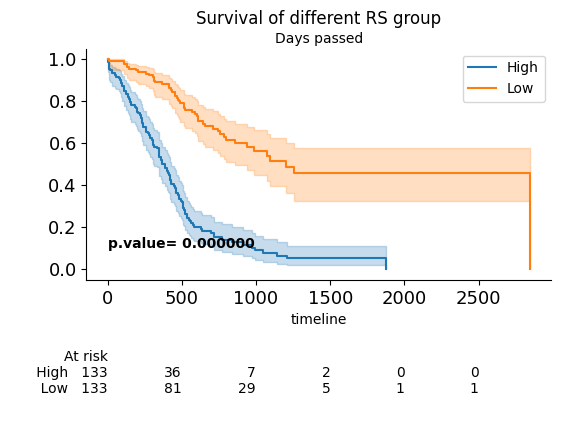

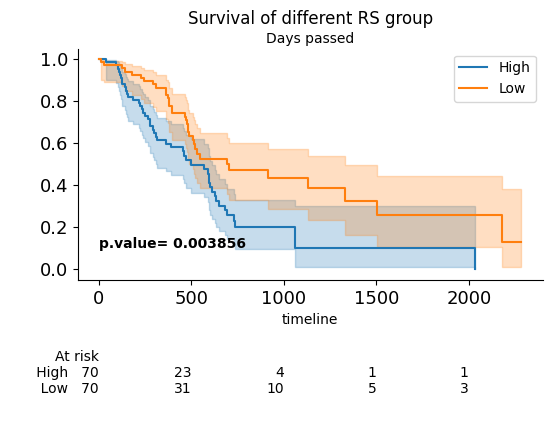

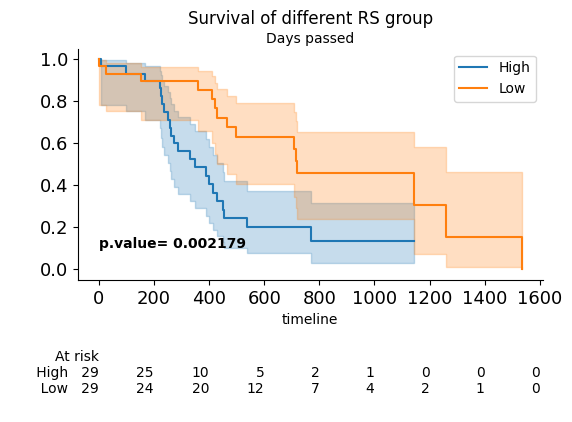

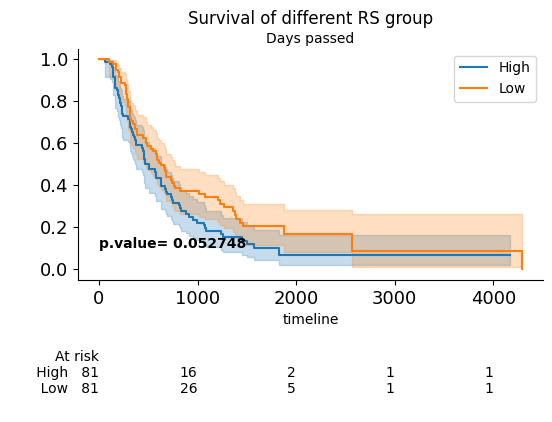

In [14]:
from utils import Risk_signature

results_df,genes_tested = Risk_signature.risk_signature_maker(pd.concat([icgcarray_os,icgcarray],axis=1),imput_gene_list=list(genes_rnaseq),out_dir="./Results/Risk_signature_TFM",
                                              validation_sets=validation_sets,variation_filter=0,show=False,n_jobs=30)

In [15]:
print(len(genes_tested))
results_df

1243


,coef,exp(coef),p
covariate,,,
ADAMTS17,0.611874,1.843884,0.010602
ST3GAL1,0.372419,1.451241,0.014063
ETFDH,0.459701,1.583600,0.008669
PCDH11X,0.585326,1.795576,0.033059
BRSK2,0.583228,1.791813,0.000009
RRAS2,0.307406,1.359894,0.004933
LYZ,-0.125443,0.882106,0.045889
SLC43A3,-0.575078,0.562661,0.016476
FZD10,0.476762,1.610849,0.005507
